# Runtime Comparison Among AVL Tree and Red Black Tree Insertion

## Import Libraries

In [93]:
from random import randint
import time
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## AVL Tree


In [94]:
class AVLNode(object): 
    def __init__(self, val): 
        self.val = val 
        self.left = None
        self.right = None
        self.height = 1
        self.root = None

class AVL_Tree(object): 
   
    def insert(self, root, key): 

        # Inserção com regras da BST 
        if not root: 
            return AVLNode(key) 
        elif key < root.val: 
            root.left = self.insert(root.left, key) 
        else: 
            root.right = self.insert(root.right, key) 
  
        # Atualização da altura do nó pai

        root.height = 1 + max(self.getHeight(root.left), 
                           self.getHeight(root.right))  
        balance = self.getBalance(root) 
  
        # Checando balanceamento do nó
        # Rotação Esquerda Esquerda 
        if balance > 1 and key < root.left.val: 
            return self.rightRotate(root) 
  
        # Rotação Direita Direita 
        if balance < -1 and key > root.right.val: 
            return self.leftRotate(root) 
  
        # Rotação Esquerda Direita 
        if balance > 1 and key > root.left.val: 
            root.left = self.leftRotate(root.left) 
            return self.rightRotate(root) 
  
        # Rotação Direita Esquerda 
        if balance < -1 and key < root.right.val: 
            root.right = self.rightRotate(root.right) 
            return self.leftRotate(root) 
  
        return root 

    def delete(self, root, key): 
  
        # Passo 1 - Perform standard BST delete 
        if not root: 
            return root 
  
        elif key < root.val: 
            root.left = self.delete(root.left, key) 
  
        elif key > root.val: 
            root.right = self.delete(root.right, key) 
  
        else: 
            if root.left is None: 
                temp = root.right 
                root = None
                return temp 
  
            elif root.right is None: 
                temp = root.left 
                root = None
                return temp 
  
            temp = self.getMinValueNode(root.right) 
            root.val = temp.val 
            root.right = self.delete(root.right, 
                                      temp.val) 
  
        # If the tree has only one node, 
        # simply return it 
        if root is None: 
            return root 
  
        # Passo 2 - Update the height of the  
        # ancestor node 
        root.height = 1 + max(self.getHeight(root.left), 
                            self.getHeight(root.right)) 
  
        # Passo 3 - Get the balance factor 
        balance = self.getBalance(root) 
  
        # Passo 4 - If the node is unbalanced,  
        # then try out the 4 cases 
        # Case 1 - Esquerda Esquerda 
        if balance > 1 and self.getBalance(root.left) >= 0: 
            return self.rightRotate(root) 
  
        # Case 2 - Direita Direita 
        if balance < -1 and self.getBalance(root.right) <= 0: 
            return self.leftRotate(root) 
  
        # Case 3 - Esquerda Direita 
        if balance > 1 and self.getBalance(root.left) < 0: 
            root.left = self.leftRotate(root.left) 
            return self.rightRotate(root) 
  
        # Case 4 - Direita Esquerda 
        if balance < -1 and self.getBalance(root.right) > 0: 
            root.right = self.rightRotate(root.right) 
            return self.leftRotate(root) 
  
        return root 

    def leftRotate(self, z): 
  
        y = z.right 
        T2 = y.left 
  
        # Realizar Rotação
        y.left = z 
        z.right = T2 
  
        # Atualizar altura da arvore
        z.height = 1 + max(self.getHeight(z.left), 
                         self.getHeight(z.right)) 
        y.height = 1 + max(self.getHeight(y.left), 
                         self.getHeight(y.right)) 
  
        # retorna a nova raiz
        return y 

    def rightRotate(self, z): 
  
        y = z.left 
        T3 = y.right 
  
        # Realiza a rotação
        y.right = z 
        z.left = T3 
  
        # Atualiza a altura
        z.height = 1 + max(self.getHeight(z.left), 
                        self.getHeight(z.right)) 
        y.height = 1 + max(self.getHeight(y.left), 
                        self.getHeight(y.right)) 
  
        # Retorna a raiz
        return y 

    def getHeight(self, root): 
        if not root: 
            return 0
  
        return root.height 
  
    def getBalance(self, root): 
        if not root: 
            return 0
  
        return self.getHeight(root.left) - self.getHeight(root.right) 
  
    def preOrder(self, root): 
  
        if not root: 
            return
  
        print("{0} ".format(root.val), end="") 
        self.preOrder(root.left) 
        self.preOrder(root.right) 

## Red Black Tree



In [115]:
class RBNode():
    def __init__(self, data):
        self.data = data  # node key
        self.parent = None # parent
        self.left = None # left child
        self.right = None # right child
        self.color = 1 # node color


class Red_Black_Tree():
    def __init__(self):
        self.NULL = RBNode(0)
        self.NULL.color = 0
        self.NULL.left = None
        self.NULL.right = None
        self.root = self.NULL

    
    def  fix_insert(self, node):
        while node.parent.color == 1:
            if node.parent == node.parent.parent.right:
                uncle = node.parent.parent.left # uncle
                if uncle.color == 1:
                    # case 3.1
                    uncle.color = 0
                    node.parent.color = 0
                    node.parent.parent.color = 1
                    node = node.parent.parent
                else:
                    if node == node.parent.left:
                        node = node.parent
                        self.rotate_right(node)
                    node.parent.color = 0
                    node.parent.parent.color = 1
                    self.rotate_left(node.parent.parent)
            else:
                uncle = node.parent.parent.right

                if uncle.color == 1:
                    uncle.color = 0
                    node.parent.color = 0
                    node.parent.parent.color = 1
                    node = node.parent.parent 
                else:
                    if node == node.parent.right:
                        node = node.parent
                        self.rotate_left(node)
                    node.parent.color = 0
                    node.parent.parent.color = 1
                    self.rotate_right(node.parent.parent)
            if node == self.root:
                break
        self.root.color = 0



    def rotate_left(self, value_x):
        value_y = value_x.right
        value_x.right = value_y.left
        if value_y.left != self.NULL:
            value_y.left.parent = value_x

        value_y.parent = value_x.parent
        if value_x.parent == None:
            self.root = value_y
        elif value_x == value_x.parent.left:
            value_x.parent.left = value_y
        else:
            value_x.parent.right = value_y
        value_y.left = value_x
        value_x.parent = value_y

    def rotate_right(self, value_x):
        value_y = value_x.left
        value_x.left = value_y.right
        if value_y.right != self.NULL:
            value_y.right.parent = value_x

        value_y.parent = value_x.parent
        if value_x.parent == None:
            self.root = value_y
        elif value_x == value_x.parent.right:
            value_x.parent.right = value_y
        else:
            value_x.parent.left = value_y
        value_y.right = value_x
        value_x.parent = value_y

    def insert(self, key):
        node = RBNode(key)
        node.parent = None
        node.data = key
        node.left = self.NULL
        node.right = self.NULL
        node.color = 1 

        value_y = None
        value_x = self.root

        # Inserção como na BST
        while value_x != self.NULL:
            value_y = value_x
            if node.data < value_x.data:
                value_x = value_x.left
            else:
                value_x = value_x.right

        node.parent = value_y
        if value_y == None:
            self.root = node
        elif node.data < value_y.data:
            value_y.left = node
        else:
            value_y.right = node

        if node.parent == None:
            node.color = 0
            return

        if node.parent.parent == None:
            return

        self.fix_insert(node)

    def get_root(self):
        return self.root

## Which algorithm is the fastest one for random values?

## Random samples for the tests

In [116]:
sample = []
runtime = []
test = []

for i in range(1000):
    sample.append(randint(0, 10000))

## Initializing the tests

### AVL

In [117]:
myTree = AVL_Tree() 
root = None

start = time.time()

for i in sample:
    root = myTree.insert(root, i) 
    
end = time.time()
runtime.append(end-start)
    
#print("Preorder traversal:\n\n") 
#myTree.preOrder(root)
# Delete 
#key = 10
#root = myTree.delete(root, key) 
  
# Preorder Traversal 
#print("Preorder Traversal after deletion -") 
#myTree.preOrder(root) 
#print() 

### Red Black Tree

In [118]:
myTree = Red_Black_Tree()

start = time.time()
for i in sample:
    myTree.insert(i)
 
end = time.time()
runtime.append(end-start)
    
runtime

[0.018341064453125, 0.00635981559753418]

## Visualizing the results

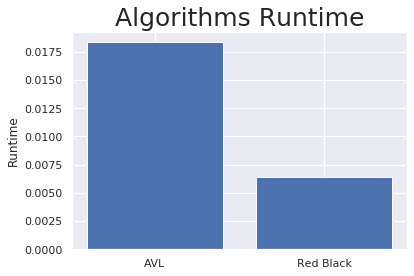

In [119]:
algorithms = ['AVL', 'Red Black']
plt.title('Algorithms Runtime', fontsize=25)
plt.ylabel('Runtime')
plt.bar(algorithms, runtime)
plt.show()

## Some Notes

As we can see, for an array with 1000 random values, going frmm 0 to 10000, the classification, regarding the smaller runtimes, in a nutsheel is:

* Red Black Tree 
* AVL Tree